# Basic feature engineering 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [29]:
print(df_train.head(10))
print(np.shape(df_train))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [30]:
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
X=df_train.drop(['Id','SalePrice'], axis=1)
y=df_train['SalePrice'].copy()

X_test=df_test.drop(['Id'],axis=1)

# Create validation set before data is cleaned 

This avoids data leakage, where information from the validation set is used to train

In [32]:
X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2, random_state=25)

# Separate categorical and numeric features 

In [33]:
num_feats = X.dtypes[X.dtypes != 'object'].index
cat_feats=X.dtypes[X.dtypes == 'object'].index
print('Null numeric values')

null_num_feats=[]
null_cat_feats=[]
for feat in num_feats:
    null= X[feat].isnull().sum()
    if null>0:
        null_num_feats.append(feat)
        print(feat, null)

print('Null categorical values')
for feat in cat_feats:
    null= X[feat].isnull().sum()
    if null>0:
        null_cat_feats.append(feat)
        print(feat, null)

Null numeric values
LotFrontage 259
MasVnrArea 8
GarageYrBlt 81
Null categorical values
Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [34]:
'''print(X_train['LotFrontage'])
print(X_train['LotFrontage'].mean())'''

"print(X_train['LotFrontage'])\nprint(X_train['LotFrontage'].mean())"

# Clean data 

In [35]:
for feat in num_feats:
    X_train[feat].fillna(X_train[feat].mean(), inplace=True)
    X_val.fillna(X_val[feat].mean(), inplace=True)
    X_test.fillna(X_test[feat].mean(), inplace=True)
    
for feat in cat_feats:
    X_train[feat].fillna('missing', inplace=True)
    X_val[feat].fillna('missing', inplace=True)
    X_test[feat].fillna('missing', inplace=True)

In [36]:
print(np.shape(X_train))
print(np.shape(X_train[num_feats]))
print(np.shape(X_train[cat_feats]))

(1168, 79)
(1168, 36)
(1168, 43)


# One hot encode categorical features

In [37]:
print(X_train[cat_feats])

     MSZoning Street    Alley LotShape LandContour Utilities LotConfig  \
955        RH   Pave  missing      IR1         HLS    AllPub    Inside   
1278       RL   Pave  missing      Reg         Lvl    AllPub    Inside   
667        RL   Pave  missing      Reg         Lvl    AllPub    Inside   
543        RH   Pave  missing      Reg         Lvl    AllPub    Inside   
1035       RL   Pave  missing      IR1         Lvl    AllPub   CulDSac   
...       ...    ...      ...      ...         ...       ...       ...   
1341       RL   Pave  missing      Reg         Lvl    AllPub    Inside   
143        RL   Pave  missing      IR1         Lvl    AllPub    Inside   
474        RL   Pave  missing      Reg         Lvl    AllPub    Inside   
318        RL   Pave  missing      Reg         Low    AllPub    Inside   
1156       RL   Pave  missing      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
955        Gtl      Crawfor       Norm  

In [38]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train[cat_feats])
encoder.get_feature_names_out()
X_train_cat=pd.DataFrame(encoder.transform(X_train[cat_feats]).toarray())
X_train_cat.columns = encoder.get_feature_names_out()
print(np.shape(X_train_cat))
print(np.shape(X_train[num_feats]))
X_train_encoded=pd.concat([X_train[num_feats].reset_index(drop=True),X_train_cat.reset_index(drop=True)], axis=1)
print(np.shape(X_train_encoded))

X_val_cat=pd.DataFrame(encoder.transform(X_val[cat_feats]).toarray())
print(np.shape(X_val_cat))
print(np.shape(X_val[num_feats]))
X_val_cat.columns = encoder.get_feature_names_out()
X_val_encoded=pd.concat([X_val[num_feats].reset_index(drop=True),X_val_cat.reset_index(drop=True)], axis=1)
print(np.shape(X_val_encoded))

X_test_cat=pd.DataFrame(encoder.transform(X_test[cat_feats]).toarray())
print(np.shape(X_test_cat))
print(np.shape(X_test[num_feats]))
X_test_cat.columns = encoder.get_feature_names_out()
X_test_encoded=pd.concat([X_test[num_feats].reset_index(drop=True),X_test_cat.reset_index(drop=True)], axis=1)
print(np.shape(X_test_encoded))

(1168, 263)
(1168, 36)
(1168, 299)
(292, 263)
(292, 36)
(292, 299)
(1459, 263)
(1459, 36)
(1459, 299)


In [39]:
for feat in num_feats:
    print(feat,X_test[feat].isnull().sum())


for feat in X_test_cat.columns:
    print(feat, X_test_cat[feat].isnull().sum())

MSSubClass 0
LotFrontage 0
LotArea 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
MasVnrArea 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
GarageYrBlt 0
GarageCars 0
GarageArea 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0
MSZoning_C (all) 0
MSZoning_FV 0
MSZoning_RH 0
MSZoning_RL 0
MSZoning_RM 0
Street_Grvl 0
Street_Pave 0
Alley_Grvl 0
Alley_Pave 0
Alley_missing 0
LotShape_IR1 0
LotShape_IR2 0
LotShape_IR3 0
LotShape_Reg 0
LandContour_Bnk 0
LandContour_HLS 0
LandContour_Low 0
LandContour_Lvl 0
Utilities_AllPub 0
LotConfig_Corner 0
LotConfig_CulDSac 0
LotConfig_FR2 0
LotConfig_FR3 0
LotConfig_Inside 0
LandSlope_Gtl 0
LandSlope_Mod 0
LandSlope_Sev 0
Neighborhood_Blmngtn 0
Neighborhood_Blueste 0
Neighborhood_BrDale 0
Neighborhood_BrkSide 0
Neighborhoo

In [40]:
for feat in X_test_encoded.columns:
        print(feat, X_test_encoded[feat].isnull().sum())

MSSubClass 0
LotFrontage 0
LotArea 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
MasVnrArea 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
GarageYrBlt 0
GarageCars 0
GarageArea 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0
MSZoning_C (all) 0
MSZoning_FV 0
MSZoning_RH 0
MSZoning_RL 0
MSZoning_RM 0
Street_Grvl 0
Street_Pave 0
Alley_Grvl 0
Alley_Pave 0
Alley_missing 0
LotShape_IR1 0
LotShape_IR2 0
LotShape_IR3 0
LotShape_Reg 0
LandContour_Bnk 0
LandContour_HLS 0
LandContour_Low 0
LandContour_Lvl 0
Utilities_AllPub 0
LotConfig_Corner 0
LotConfig_CulDSac 0
LotConfig_FR2 0
LotConfig_FR3 0
LotConfig_Inside 0
LandSlope_Gtl 0
LandSlope_Mod 0
LandSlope_Sev 0
Neighborhood_Blmngtn 0
Neighborhood_Blueste 0
Neighborhood_BrDale 0
Neighborhood_BrkSide 0
Neighborhoo

In [41]:
for feat in  X_train_encoded.columns:
    print(feat)
    

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_Pave
Alley_missing
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV

In [42]:
print(X_train_encoded.head(5))

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          90    82.000000     7136            6            6       1946   
1          60    75.000000     9473            8            5       2002   
2          20    65.000000     8125            6            5       1994   
3         120    34.000000     4058            7            5       1998   
4          20    70.144928    11500            4            3       1957   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          1950  423.000000         484           0  ...             0.0   
1          2002  102.289157         804           0  ...             0.0   
2          1998  258.000000        1138           0  ...             0.0   
3          1998  182.000000         584         139  ...             0.0   
4          1957    0.000000           0           0  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0  

In [43]:
y_train.to_csv("y_train", index=False) 
y_val.to_csv("y_val", index=False)

X_train_encoded.to_csv("X_train_basic", index=False)
X_val_encoded.to_csv("X_val_basic", index=False)
X_test_encoded.to_csv("X_test_basic", index=False)

# Linear model

attempting to add a linear model as a feature to use in xgboost

In [44]:
lin=LinearRegression()
lin.fit(X_train[num_feats],y_train)
y_lin_pred_train=lin.predict(X_train[num_feats])
y_lin_pred_val=lin.predict(X_val[num_feats])
y_lin_pred_test=lin.predict(X_test[num_feats])

train_error=mean_squared_error(y_lin_pred_train,y_train,squared=False)
val_error=mean_squared_error(y_lin_pred_val,y_val,squared=False)
print(train_error)
print(val_error)
print(val_error/train_error)

33590.357424841925
59787.44926584914
1.7798991689690393


Interestingly I expected this the ratio of train to test error to be lower compared with the other models I have used (see modelling notebook).


In [45]:
print(pd.DataFrame(y_lin_pred_train))

                  0
0     159186.236818
1     255274.287530
2     227714.983229
3     157930.492465
4      59534.444466
...             ...
1163  176472.889688
1164  222094.046327
1165  235179.904721
1166  288152.775141
1167  161501.347585

[1168 rows x 1 columns]


In [46]:
X_train_lin=X_train_encoded.copy().join(pd.DataFrame(y_lin_pred_train))
X_val_lin=X_val_encoded.copy().join(pd.DataFrame(y_lin_pred_val))
X_test_lin=X_test_encoded.copy().join(pd.DataFrame(y_lin_pred_test))
#print(X_train_lin.head(5))

In [47]:
X_train_lin.to_csv("X_train_lin", index=False)
X_val_lin.to_csv("X_val_lin", index=False)
X_test_lin.to_csv("X_test_lin", index=False)

# visualising data 

In [48]:
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

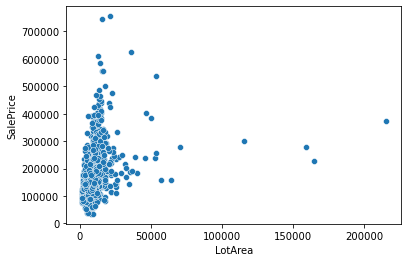

In [49]:
sns.scatterplot(data=df_train,x='LotArea',y='SalePrice') 


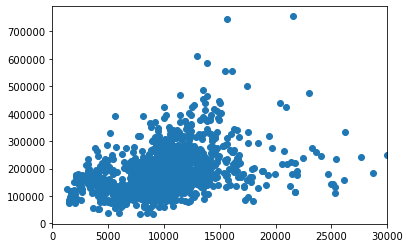

In [50]:
plt.scatter(df_train['LotArea'],df_train['SalePrice'])
plt.xlim(0,30000)

plt.show()

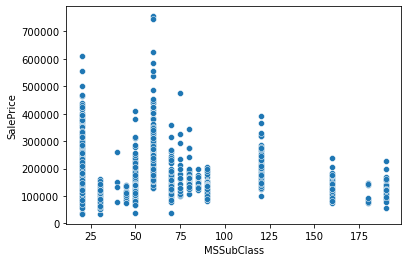

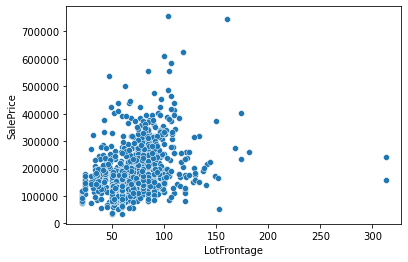

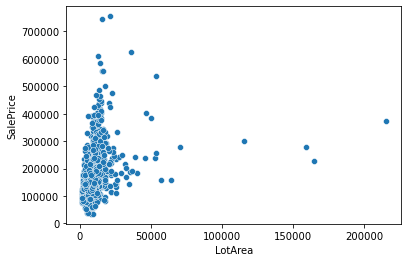

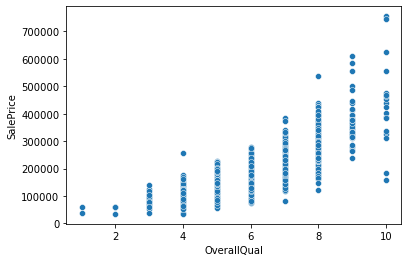

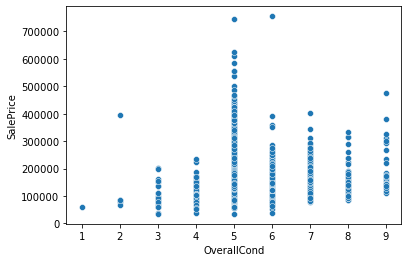

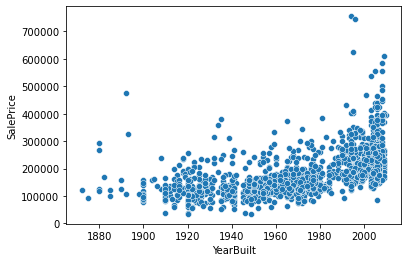

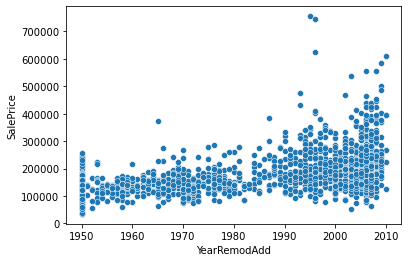

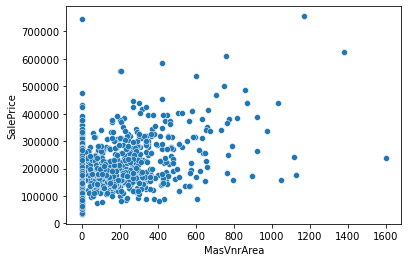

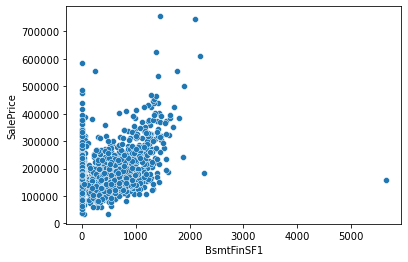

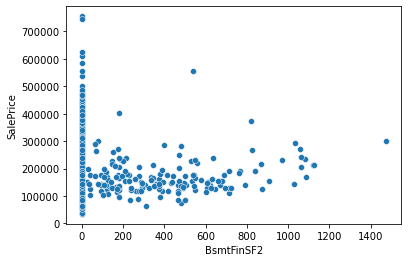

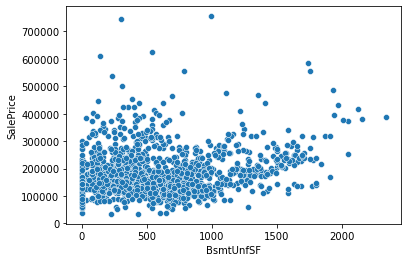

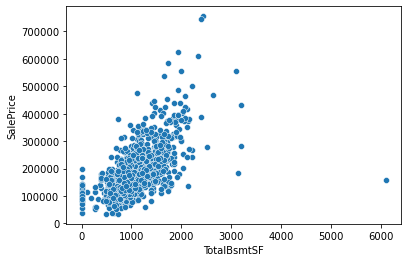

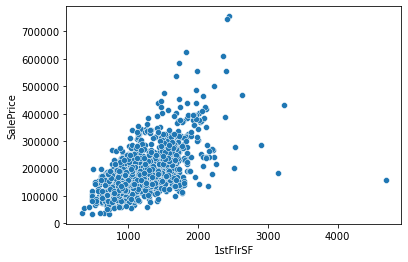

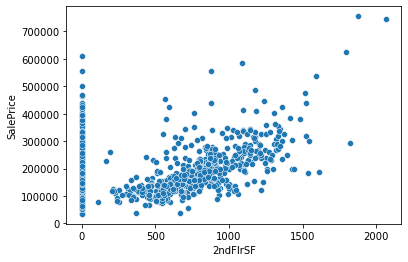

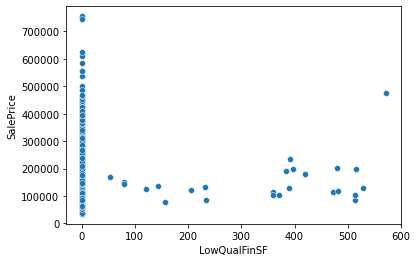

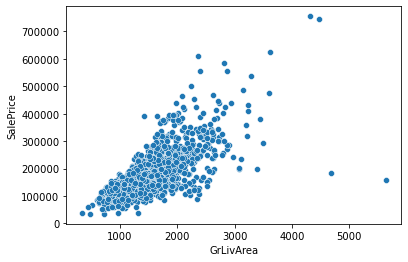

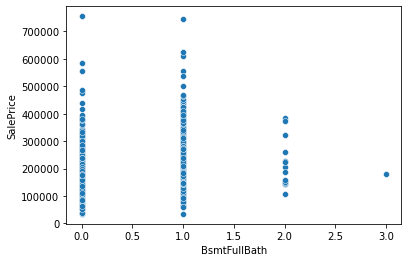

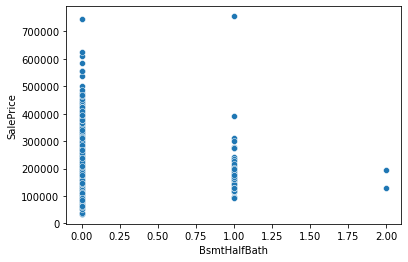

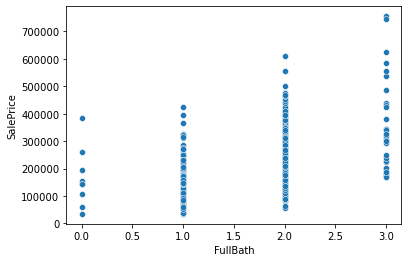

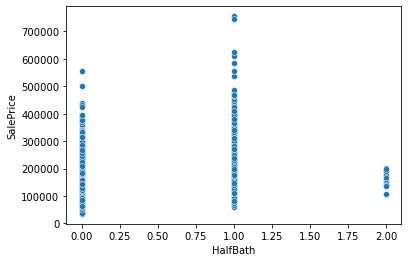

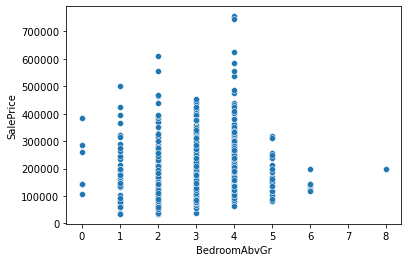

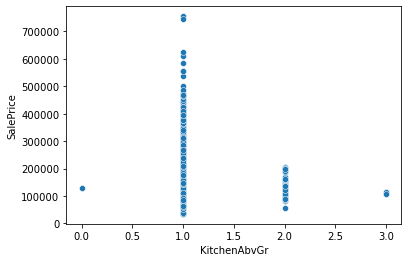

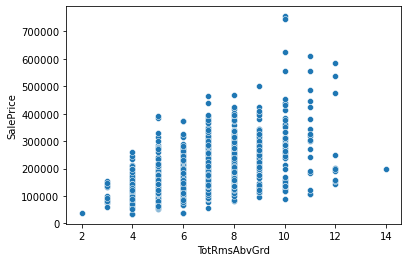

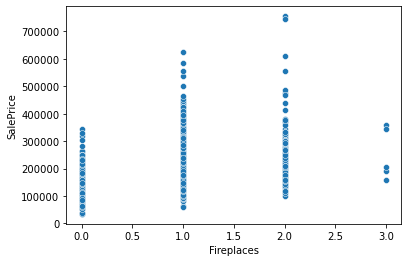

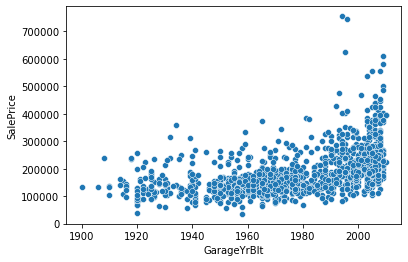

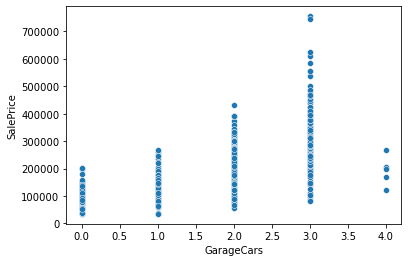

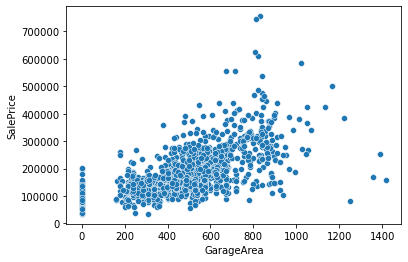

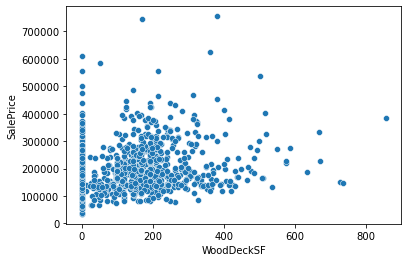

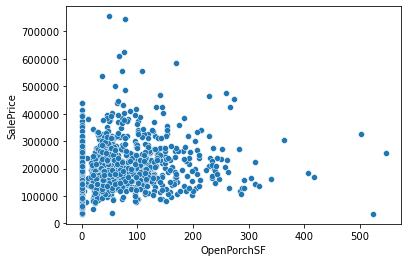

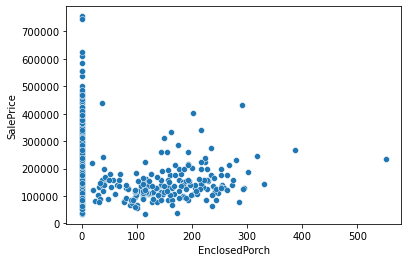

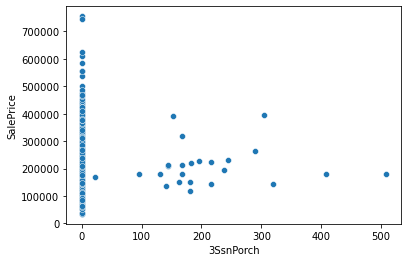

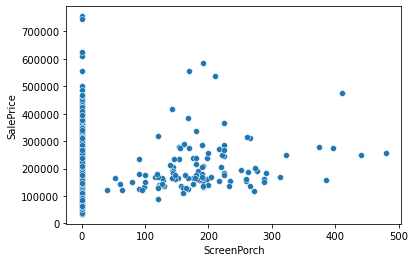

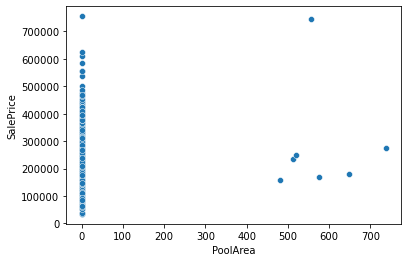

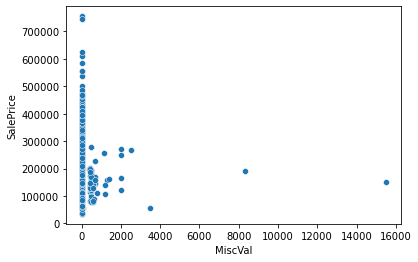

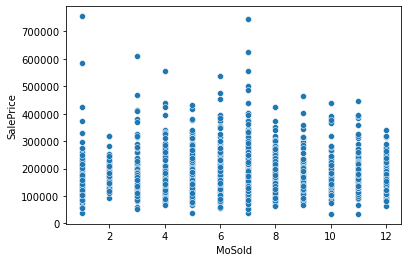

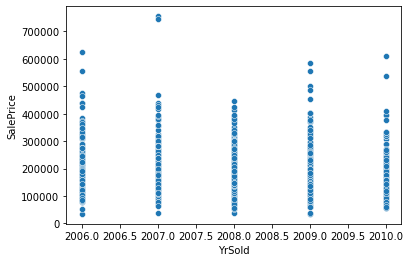

In [51]:
for feat in num_feats:
    sns.scatterplot(data=df_train,x=feat,y='SalePrice') 
    plt.show()

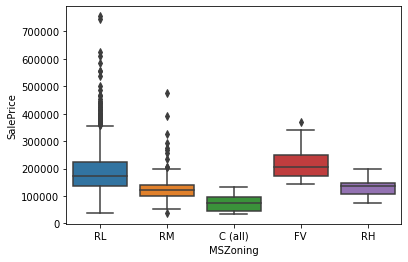

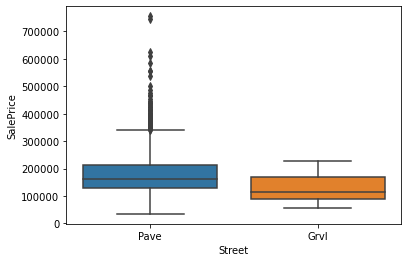

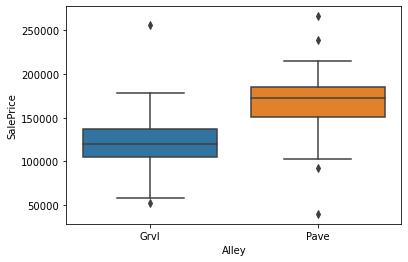

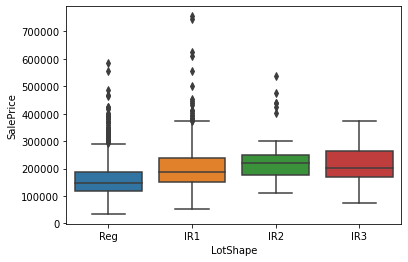

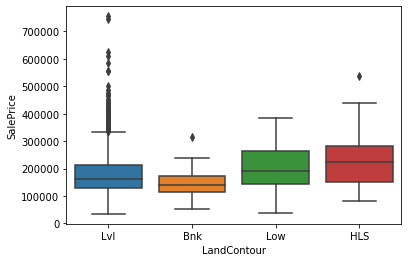

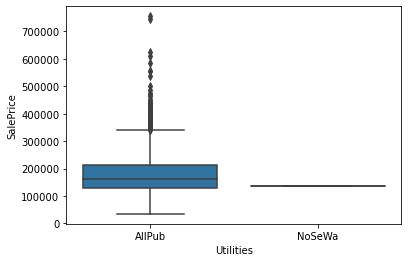

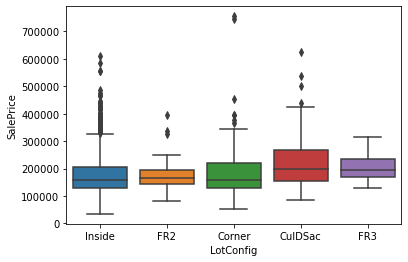

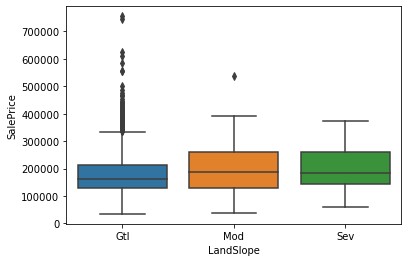

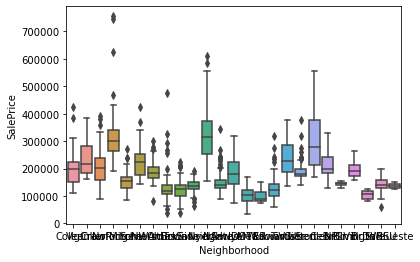

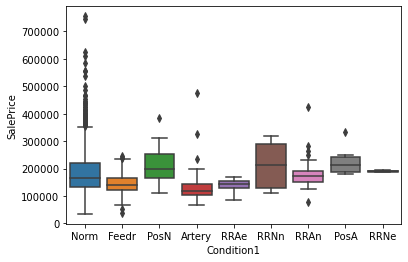

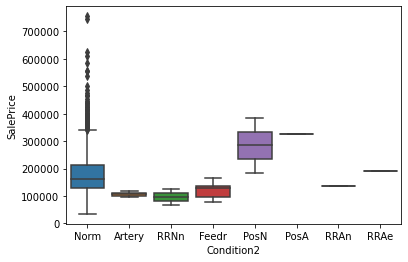

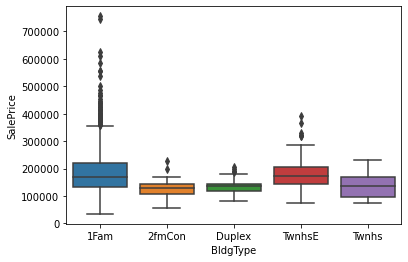

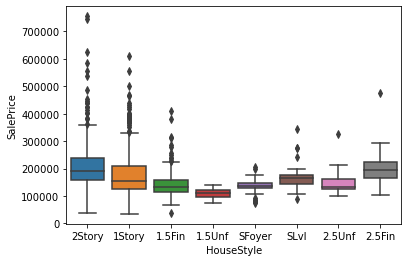

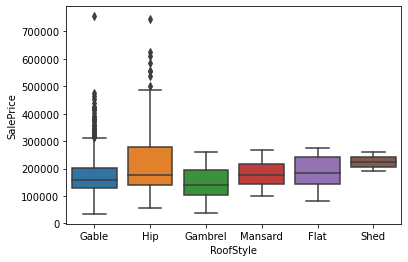

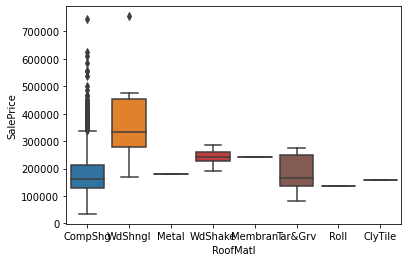

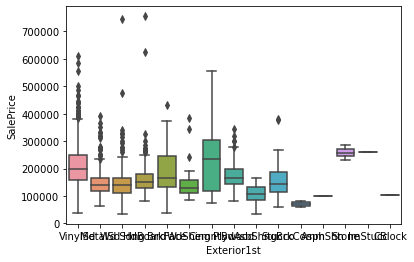

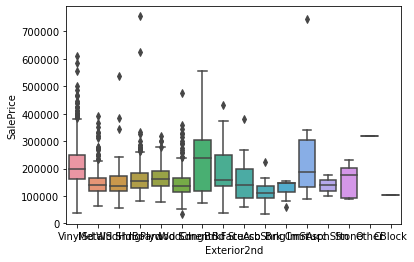

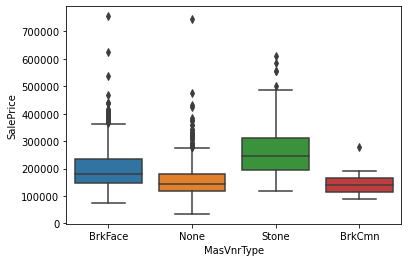

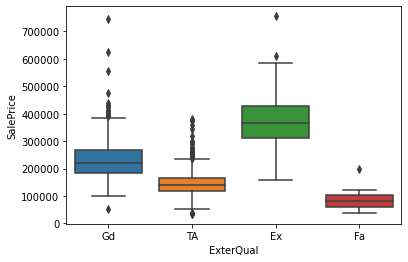

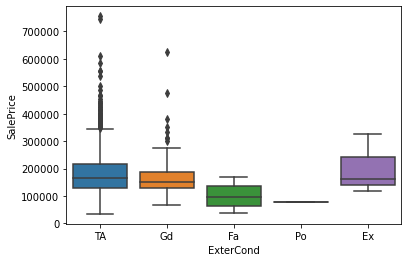

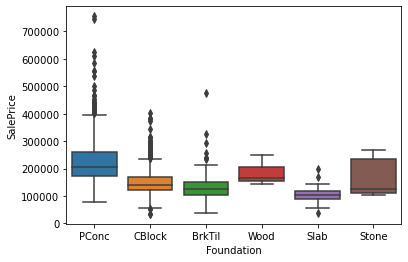

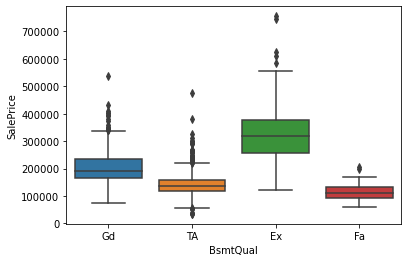

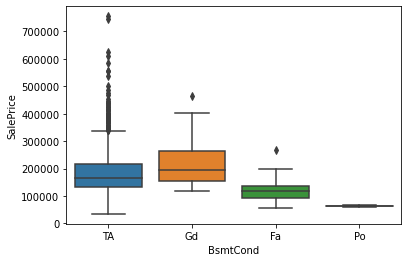

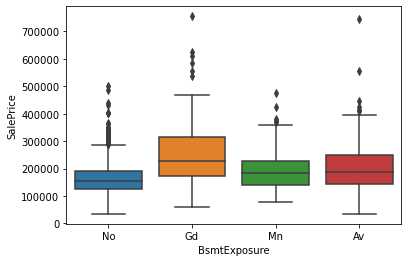

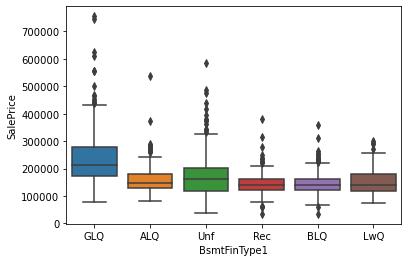

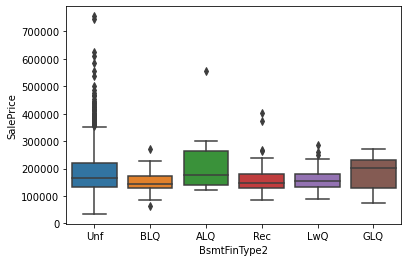

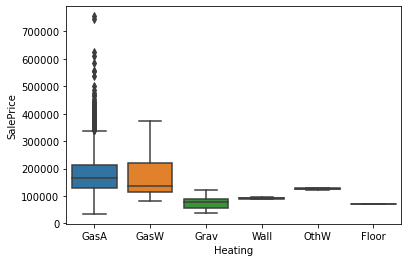

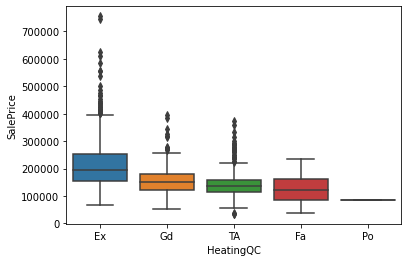

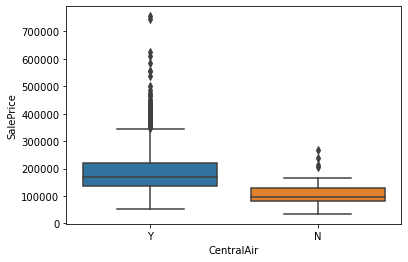

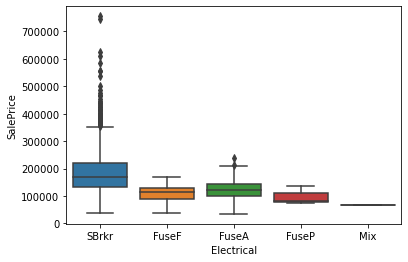

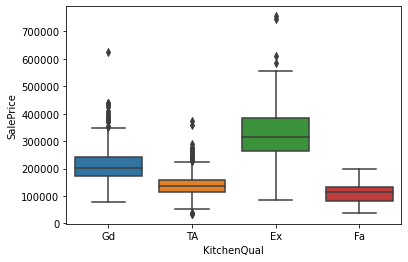

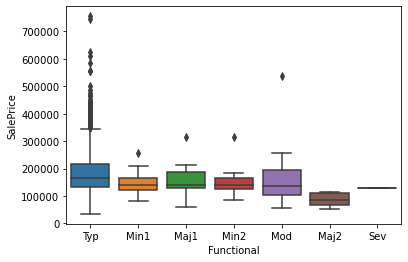

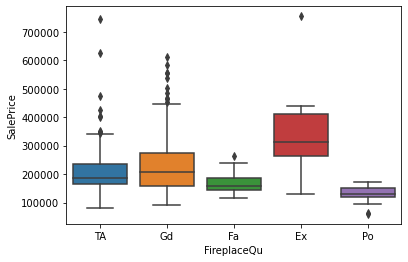

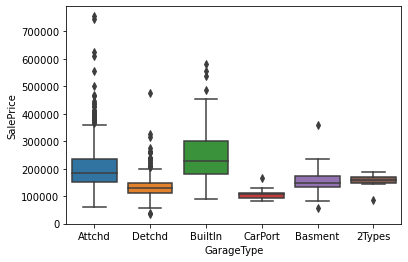

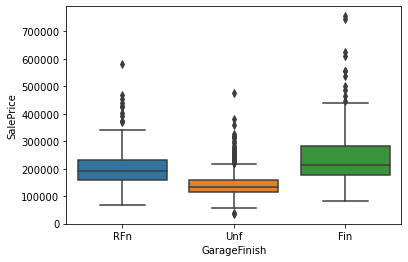

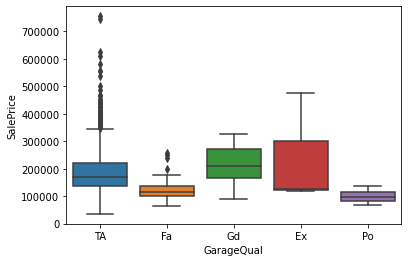

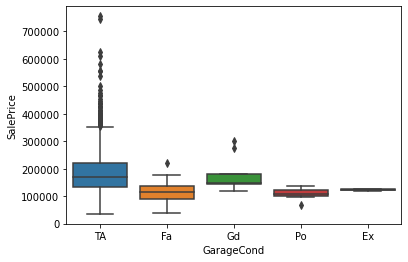

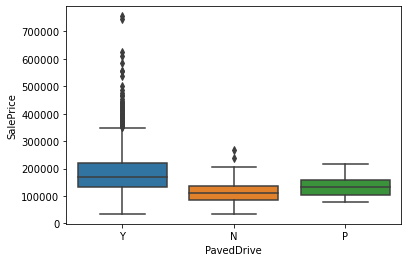

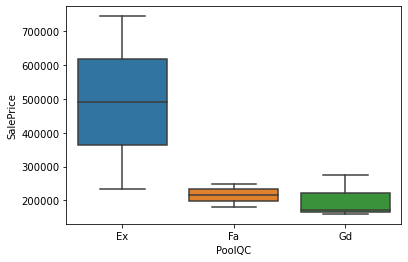

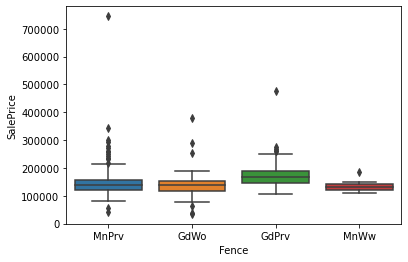

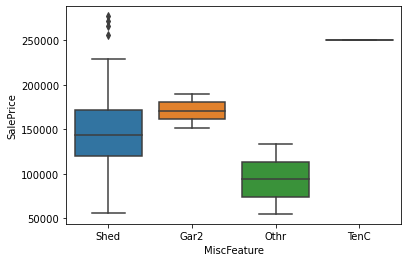

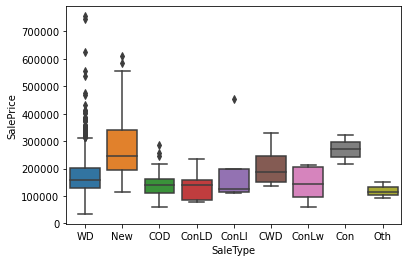

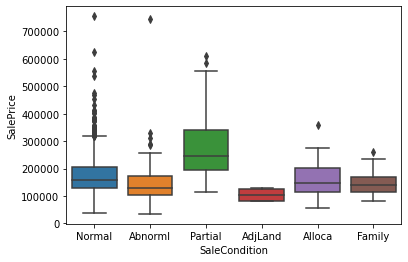

In [52]:
for feat in cat_feats:
    sns.boxplot(data=df_train,x=feat,y='SalePrice') 
    plt.show()

In [53]:
'''plt.scatter(df_train['LotArea'],df_train['SalePrice'])
plt.show()
plt.scatter(df_train['LandSlope'],df_train['SalePrice'])
plt.show()
plt.scatter(df_train['LotArea'][df_train['LandSlope']=='Gtl'],df_train['SalePrice'][df_train['LandSlope']=='Gtl'])
plt.show()
plt.scatter(df_train['LotArea'][df_train['LandSlope']=='Mod'],df_train['SalePrice'][df_train['LandSlope']=='Mod'])
plt.show()
plt.scatter(df_train['LotArea'][df_train['LandSlope']=='Sev'],df_train['SalePrice'][df_train['LandSlope']=='Sev'])
plt.show()'''

"plt.scatter(df_train['LotArea'],df_train['SalePrice'])\nplt.show()\nplt.scatter(df_train['LandSlope'],df_train['SalePrice'])\nplt.show()\nplt.scatter(df_train['LotArea'][df_train['LandSlope']=='Gtl'],df_train['SalePrice'][df_train['LandSlope']=='Gtl'])\nplt.show()\nplt.scatter(df_train['LotArea'][df_train['LandSlope']=='Mod'],df_train['SalePrice'][df_train['LandSlope']=='Mod'])\nplt.show()\nplt.scatter(df_train['LotArea'][df_train['LandSlope']=='Sev'],df_train['SalePrice'][df_train['LandSlope']=='Sev'])\nplt.show()"

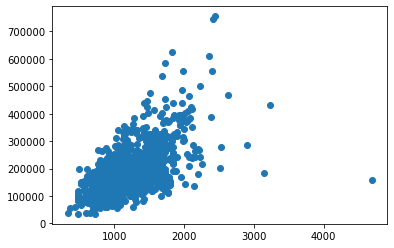

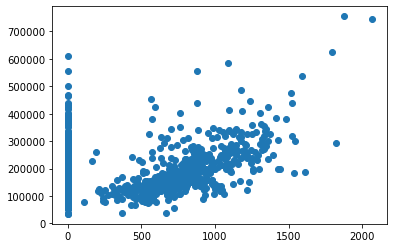

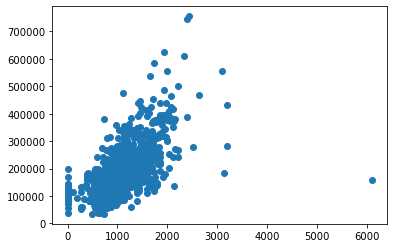

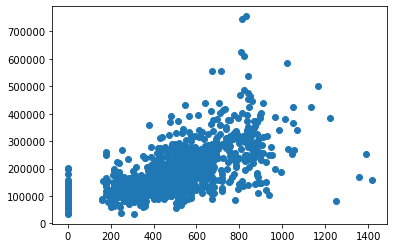

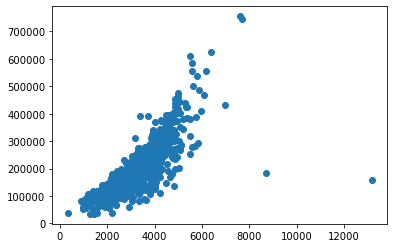

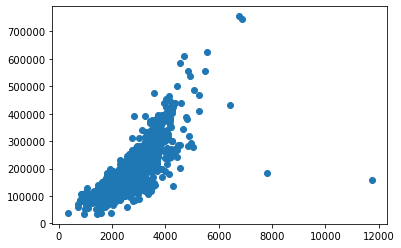

In [54]:
#create total square footage
plt.scatter(df_train['1stFlrSF'],df_train['SalePrice'])
plt.show()
plt.scatter(df_train['2ndFlrSF'],df_train['SalePrice'])
plt.show()
plt.scatter(df_train['TotalBsmtSF'],df_train['SalePrice'])
plt.show()
plt.scatter(df_train['GarageArea'],df_train['SalePrice'])
plt.show()

plt.scatter(df_train['1stFlrSF']+df_train['2ndFlrSF']+df_train['TotalBsmtSF']+df_train['GarageArea'],df_train['SalePrice'])
plt.show()
plt.scatter(df_train['1stFlrSF']+df_train['2ndFlrSF']+df_train['TotalBsmtSF']-df_train['LowQualFinSF'],df_train['SalePrice'])
plt.show()

In [55]:
print(df_train[['1stFlrSF','2ndFlrSF','TotalBsmtSF','SalePrice','GarageArea']].corr()['SalePrice'])
new_df=pd.DataFrame(df_train['1stFlrSF']+df_train['2ndFlrSF']+df_train['TotalBsmtSF']+df_train['GarageArea'])
print(new_df.join(df_train['SalePrice']).corr())
#better correlation than any other!
new_df=pd.DataFrame(df_train['1stFlrSF']+df_train['2ndFlrSF']+df_train['TotalBsmtSF']+df_train['GarageArea']-df_train['LowQualFinSF'])
print(new_df.join(df_train['SalePrice']).corr())
#slightly better!

1stFlrSF       0.605852
2ndFlrSF       0.319334
TotalBsmtSF    0.613581
SalePrice      1.000000
GarageArea     0.623431
Name: SalePrice, dtype: float64
                  0  SalePrice
0          1.000000   0.809561
SalePrice  0.809561   1.000000
                  0  SalePrice
0          1.000000   0.809525
SalePrice  0.809525   1.000000


In [56]:
total_SF_train=pd.DataFrame(X_train_encoded['1stFlrSF']+X_train_encoded['2ndFlrSF']+X_train_encoded['TotalBsmtSF']+X_train_encoded['GarageArea'])
total_SF_train.columns=['total_SF']
total_SF_val=pd.DataFrame(X_val_encoded['1stFlrSF']+X_val_encoded['2ndFlrSF']+X_val_encoded['TotalBsmtSF']+X_val_encoded['GarageArea'])
total_SF_val.columns=['total_SF']
total_SF_test=pd.DataFrame(X_test_encoded['1stFlrSF']+X_test_encoded['2ndFlrSF']+X_test_encoded['TotalBsmtSF']+X_test_encoded['GarageArea'])
total_SF_test.columns=['total_SF']

inside_SF_train=pd.DataFrame(X_train_encoded['1stFlrSF']+X_train_encoded['2ndFlrSF']+X_train_encoded['TotalBsmtSF'])
inside_SF_train.columns=['inside_SF']
inside_SF_val=pd.DataFrame(X_val_encoded['1stFlrSF']+X_val_encoded['2ndFlrSF']+X_val_encoded['TotalBsmtSF'])
inside_SF_val.columns=['inside_SF']
inside_SF_test=pd.DataFrame(X_test_encoded['1stFlrSF']+X_test_encoded['2ndFlrSF']+X_test_encoded['TotalBsmtSF'])
inside_SF_test.columns=['inside_SF']



new_feats_train=total_SF_train.join(inside_SF_train)
new_feats_val=total_SF_val.join(inside_SF_val)
new_feats_test=total_SF_test.join(inside_SF_test)

'''new_feats_train=pd.concat(total_SF_train,good_SF_train, axis=1)
new_feats_val=pd.concat(total_SF_val,good_SF_val, axis=1)
new_feats_test=pd.concat(total_SF_test,good_SF_test, axis=1)'''

X_train_SF=X_train_encoded.copy().join(new_feats_train)
X_val_SF=X_val_encoded.copy().join(new_feats_val)
X_test_SF=X_test_encoded.copy().join(new_feats_test)
print(X_train_SF.head(5))

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          90    82.000000     7136            6            6       1946   
1          60    75.000000     9473            8            5       2002   
2          20    65.000000     8125            6            5       1994   
3         120    34.000000     4058            7            5       1998   
4          20    70.144928    11500            4            3       1957   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_Oth  \
0          1950  423.000000         484           0  ...           0.0   
1          2002  102.289157         804           0  ...           0.0   
2          1998  258.000000        1138           0  ...           0.0   
3          1998  182.000000         584         139  ...           0.0   
4          1957    0.000000           0           0  ...           0.0   

   SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0          1.0                    

In [57]:
X_train_SF.to_csv("X_train_SF", index=False)
X_val_SF.to_csv("X_val_SF", index=False)
X_test_SF.to_csv("X_test_SF", index=False)

In [58]:
X_train_encoded['LowQualFinSF'][X_train_encoded['LowQualFinSF']!=0]

49      144
181     232
187     360
277     120
278      80
329     479
368     384
417      53
567     234
597     572
773     205
778     371
790     392
969     420
986     528
991     390
1066    360
1098    481
1142    473
Name: LowQualFinSF, dtype: int64

# size of house and garden

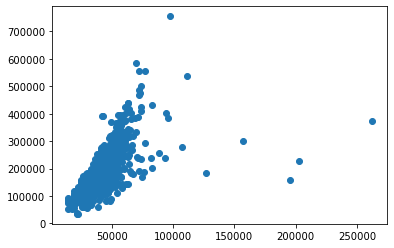

In [92]:
plt.scatter(10*X_train_SF['total_SF']+X_train_SF['LotArea'],y_train)
plt.show()

# general quality features


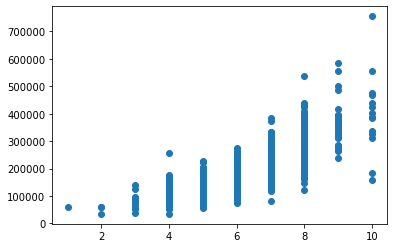

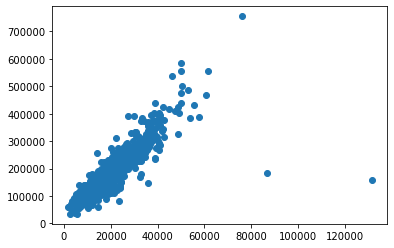

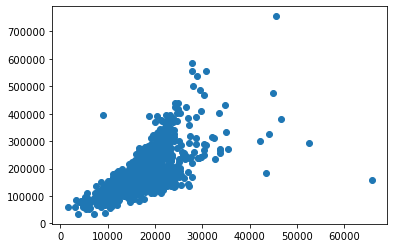

In [72]:
plt.scatter(X_train_SF['OverallQual'],y_train)
plt.show()
plt.scatter(X_train_SF['OverallQual']*X_train_SF['total_SF'],y_train)
plt.show()
plt.scatter(X_train_SF['OverallCond']*X_train_SF['total_SF'],y_train)
plt.show()

In [68]:
qual_size_train=pd.DataFrame(X_train_SF['OverallQual']*X_train_SF['total_SF'])
qual_size_train.columns=['qual_size']
qual_size_val=pd.DataFrame(X_val_SF['OverallQual']*X_val_SF['total_SF'])
qual_size_val.columns=['qual_size']
qual_size_test=pd.DataFrame(X_test_SF['OverallQual']*X_test_SF['total_SF'])
qual_size_test.columns=['qual_size']

In [71]:
X_train_eng=X_train_SF.copy().join(qual_size_train)
X_val_eng=X_val_SF.copy().join(qual_size_val)
X_test_eng=X_test_SF.copy().join(qual_size_test)
print(X_train_eng.head(5))

X_train_eng.to_csv("X_train_eng", index=False)
X_val_eng.to_csv("X_val_eng", index=False)
X_test_eng.to_csv("X_test_eng", index=False)

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          90    82.000000     7136            6            6       1946   
1          60    75.000000     9473            8            5       2002   
2          20    65.000000     8125            6            5       1994   
3         120    34.000000     4058            7            5       1998   
4          20    70.144928    11500            4            3       1957   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_WD  \
0          1950  423.000000         484           0  ...          1.0   
1          2002  102.289157         804           0  ...          1.0   
2          1998  258.000000        1138           0  ...          1.0   
3          1998  182.000000         584         139  ...          1.0   
4          1957    0.000000           0           0  ...          1.0   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                    0.0       

# Age 

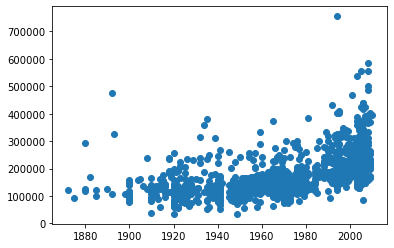

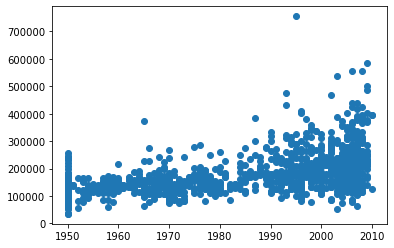

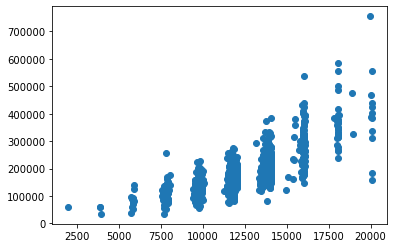

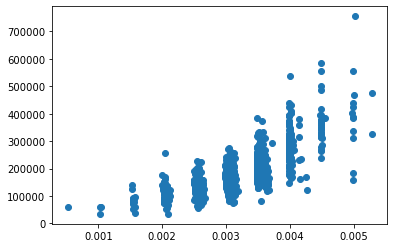

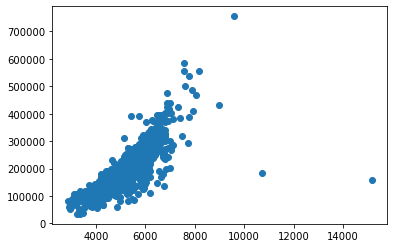

In [84]:
plt.scatter(X_train_SF['YearBuilt'],y_train)
plt.show()
plt.scatter(X_train_SF['YearRemodAdd'],y_train)
plt.show()
plt.scatter(X_train_SF['YearBuilt']*X_train_SF['OverallQual'],y_train)
plt.show()
plt.scatter(X_train_SF['OverallQual']/X_train_SF['YearBuilt'],y_train)
plt.show()
plt.scatter(X_train_SF['total_SF']+X_train_SF['YearBuilt'],y_train)
plt.show()